# CSYE 7230: Assignment 1

Submitted by: Rishabh Kaushick

# 1. Environment Setup (5%)

In [2]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Loading The Dataset

In [3]:
# Loading Fashion MNIST dataset
fashion_mnist_train = pd.read_csv('./data/fashion-mnist_train.csv')
fashion_mnist_test = pd.read_csv('./data/fashion-mnist_test.csv')

## Libraries Used & Their Versions

The following libraries have been used in this virtual environment:

In [4]:
# libraires & thier versions
!pip freeze

absl-py==2.1.0
aiohappyeyeballs==2.4.4
aiohttp==3.11.11
aiosignal==1.3.2
annotated-types==0.7.0
anyio==4.8.0
argon2-cffi==23.1.0
argon2-cffi-bindings==21.2.0
arrow==1.3.0
asttokens==3.0.0
async-lru==2.0.4
async-timeout==5.0.1
attrs==24.3.0
babel==2.16.0
backoff==2.2.1
beautifulsoup4==4.12.3
bleach==6.2.0
boto3==1.35.96
botocore==1.35.96
cachetools==5.5.0
certifi==2024.12.14
cffi==1.17.1
charset-normalizer==3.4.1
click==8.1.8
comm==0.2.2
contourpy==1.3.1
cycler==0.12.1
debugpy==1.8.11
decorator==5.1.1
defusedxml==0.7.1
exceptiongroup==1.2.2
executing==2.1.0
fastapi==0.115.6
fastjsonschema==2.21.1
filelock==3.16.1
fire==0.7.0
fonttools==4.55.3
fqdn==1.5.1
frozenlist==1.5.0
fsspec==2024.12.0
google-auth==2.37.0
google-auth-oauthlib==1.2.1
graphviz==0.20.3
grpcio==1.69.0
h11==0.14.0
httpcore==1.0.7
httptools==0.6.4
httpx==0.28.1
idna==3.10
ipykernel==6.26.0
ipython==8.17.2
ipywidgets==8.1.1
isoduration==20.11.0
jedi==0.19.2
Jinja2==3.1.5
jmespath==1.0.1
joblib==1.4.2
json5==0.10.0
jsonpoin

All of this code was executed on the 

# 2. Dataset Exploration (5%)

## Data Characteristics

In [5]:
# number of instances
print("Number of instances in Train:")
fashion_mnist_train.info()

print("\nNumber of instances in Test:")
fashion_mnist_test.info()

Number of instances in Train:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 359.3 MB

Number of instances in Test:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 59.9 MB


In [6]:
fashion_mnist_train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
# understanding the labels
fashion_mnist_train['label'].unique()

array([2, 9, 6, 0, 3, 4, 5, 8, 7, 1])

Based on the information provided in the data description, the label numbers correspond to the following clothing items:
<table>
  <tr>
    <th>Label</th>
    <th>Clothing</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/ Top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
  <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
  <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
  <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
  <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
  <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
  <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
  <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
  <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>

In [8]:
fashion_mnist_train.min()

label       0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel780    0
pixel781    0
pixel782    0
pixel783    0
pixel784    0
Length: 785, dtype: int64

In [9]:
fashion_mnist_train.max()

label         9
pixel1       16
pixel2       36
pixel3      226
pixel4      164
           ... 
pixel780    255
pixel781    255
pixel782    255
pixel783    255
pixel784    170
Length: 785, dtype: int64

From the above cells we can see that the pixel value of the image range from 0 to 255.

## Data Preprocessing

In [11]:
# converting the data frame to numpy array for easy manipulation
train_np_array = np.array(fashion_mnist_train, dtype = 'float32')
test_np_array = np.array(fashion_mnist_test, dtype = 'float32')

### Normalizing Data

Below are two preprocessing steps:
1. Split the attributes (x) and the label (y)
2. Normalize the pixel values (instead of 0 to 255 --> 0 to 1)

In [12]:
# spliting x train and y train & normalizing x train
x_train = train_np_array[:,1:]/255
y_train = train_np_array[:,0]

# spliting x test and y test & normalizing x test
x_test= test_np_array[:,1:]/255
y_test=test_np_array[:,0]

### Train & Validation Split

In [14]:
from sklearn.model_selection import train_test_split

In [18]:
x_train, x_validate, y_train, y_validate = train_test_split(x_train, y_train, test_size=0.2, random_state=2315)
print(f'Number of rows in x_train --> {len(x_train)} & in the x_validate --> {len(x_validate)}')

Number of rows in x_train --> 24576 & in the x_validate --> 6144


## Visualizing Sample Images

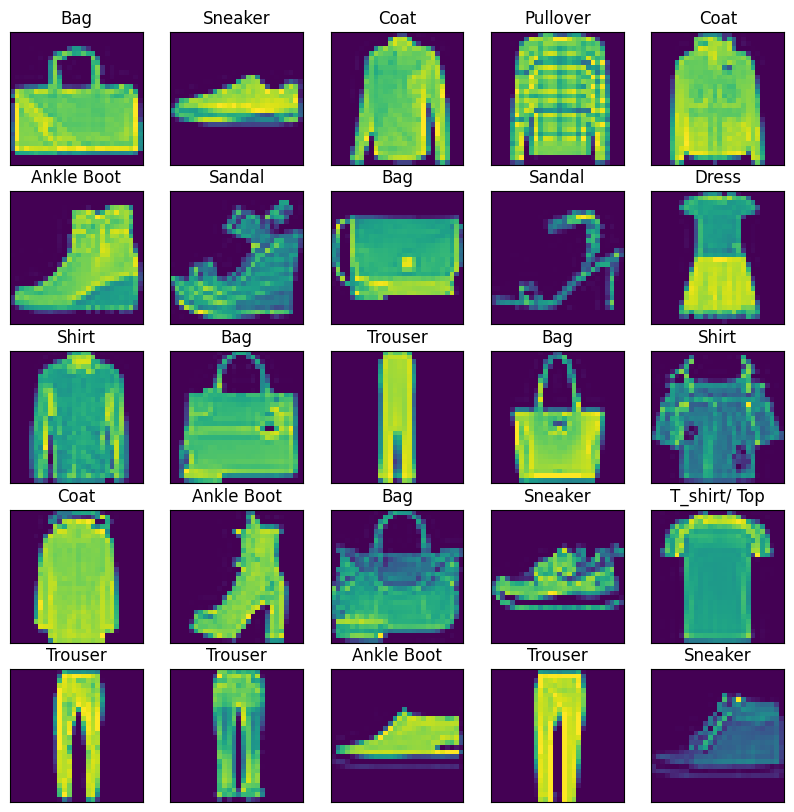

In [20]:
class_names = ['T_shirt/ Top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']

plt.figure(figsize=(10, 10))
# plotting the first 25 images with 5x5 subplots
for i in range(25):
    plt.subplot(5, 5, i + 1)
    # no need for any x or y labels (ticks)
    plt.xticks([])
    plt.yticks([])
    # no need for a grid
    plt.grid(False)
    plt.imshow(x_train[i].reshape((28,28)))
    # getting the label number
    label_index = int(y_train[i])
    # displaying the corresponding clothing class name
    plt.title(class_names[label_index])
plt.show()